In [1]:
import zipfile

# Define paths
zip_path = "/content/colone cancer (2).zip"  # Update if needed
extract_path = "/content/dataset"

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [2]:
import os
import numpy as np
import pandas as pd
from openpyxl import Workbook

label_map = {
    "BLI":0,
    "LCI":1,
    "WLI":2,
    "NBI":3,
    "FICE":4
}

data_dir="/content/dataset/MERGED_PICS"

data=[]

wb = Workbook()
ws = wb.active
ws.title = "Labeled Images"


ws.append(["image", "label"])

for files in os.listdir(data_dir):
    first_name=files.split("_")[0]
    if first_name in label_map:
        label=label_map[first_name]
        ws.append([files,label])

excel_file = 'COLON_CANCER_images_labelled_categorical_modified.xlsx'
wb.save(excel_file)

print(f"Excel file created successfully: {excel_file}")

Excel file created successfully: COLON_CANCER_images_labelled_categorical_modified.xlsx


In [3]:
from collections import Counter
import pandas as pd

# Load the Excel file into a pandas DataFrame
excel_file = 'COLON_CANCER_images_labelled_categorical_modified.xlsx'
df = pd.read_excel(excel_file)

# Get the labels from the 'label' column
Labeled_Images = df['label'].tolist() # Assign the labels to Labeled_Images

# Now you can use Labeled_Images in the Counter function
label_counts = Counter(Labeled_Images)

# Print the count of images in each class

for class_name, label in label_map.items():
    count = label_counts.get(label, 0)
    print(f"Class {class_name} ({label}): {count} images")

print(f" Sample Labels: {Labeled_Images[:10]}")


Class BLI (0): 70 images
Class LCI (1): 60 images
Class WLI (2): 3588 images
Class NBI (3): 146 images
Class FICE (4): 70 images
 Sample Labels: [2, 4, 2, 2, 2, 2, 2, 2, 2, 2]


In [4]:
import pandas as pd

In [5]:
excel_file = 'COLON_CANCER_images_labelled_categorical_modified.xlsx'  # Replace with your file path
df = pd.read_excel(excel_file)

In [6]:
image_labels = df['label'].tolist()

In [7]:
print(image_labels)

[2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 

In [8]:
image_labels_shape = df['label'].shape

# Print the shape
print(image_labels_shape)

(3934,)


In [9]:
num_labels = df['label'].to_numpy()

In [10]:
num_labels.shape

(3934,)

In [11]:
import cv2
import os
import numpy as np

image_folder = "/content/dataset/MERGED_PICS"  # Change to your image path

image_paths = []
images = []

# Desired shape
desired_shape = (256, 256)

for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)

    if os.path.exists(img_path):
        image_paths.append(img_path)

        img = cv2.imread(img_path)

        if img is not None:  # Ensure image is loaded correctly
            img = cv2.resize(img, desired_shape)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            images.append(img)

print(f"Loaded {len(images)} images.")

# Convert to NumPy array
images = np.array(images, dtype=np.uint8)

# Normalize (Optional for deep learning)
# images = images / 255.0

print(f"Final image array shape: {images.shape}")

Loaded 3934 images.
Final image array shape: (3934, 256, 256, 3)


In [12]:
from tensorflow.keras.utils import to_categorical # Import the to_categorical function

data_labels = to_categorical(num_labels) #Now to_categorical is defined and can be used.
data_labels.shape

(3934, 5)

In [13]:

import tensorflow as tf # Make sure you have tensorflow installed: !pip install tensorflow
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, data_labels, test_size = 0.15, random_state = 49)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 49)

x_train = tf.convert_to_tensor(x_train)
x_val = tf.convert_to_tensor(x_val)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
y_val = tf.convert_to_tensor(y_val)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2674, 256, 256, 3)
(669, 256, 256, 3)
(591, 256, 256, 3)
(2674, 5)
(669, 5)
(591, 5)


In [14]:
num_classes = 5
learning_rate = 0.01
batch_size = 32
num_epochs = 40
decay = 0.0001
momentum = 0.5

In [15]:
from tensorflow import keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam , Adagrad, SGD, RMSprop
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [16]:
def get_model():
    model = keras.models.Sequential()

    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(256,256,3)))

    model.add(MaxPool2D((4,4)))


    model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', padding='same'))

    model.add(MaxPool2D((2,2)))


    model.add(Flatten())

    model.add(Dense(32, activation='relu'))


    model.add(Dense(num_classes, activation='softmax'))

    return model

In [17]:
keras.backend.clear_session()

In [18]:
model_adam = get_model()
model_adam.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 16)          │          12,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         524,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 539,733 (2.06 MB)

 Trainable params: 539,733 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_adam.compile(optimizer=Adam(learning_rate=learning_rate, decay = decay) ,
              loss='categorical_crossentropy', metrics = ["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [20]:
callback = EarlyStopping(monitor = "loss", patience = 10, restore_best_weights=True)

model_adam_history = model_adam.fit(x_train,y_train, validation_data=(x_val, y_val) , epochs= num_epochs, batch_size= batch_size, callbacks = [callback])

Epoch 1/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.8269 - loss: 222.2752 - val_accuracy: 0.9507 - val_loss: 0.2596
Epoch 2/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9530 - loss: 0.2293 - val_accuracy: 0.9507 - val_loss: 0.1838
Epoch 3/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9546 - loss: 0.1706 - val_accuracy: 0.9447 - val_loss: 0.1972
Epoch 4/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9593 - loss: 0.1535 - val_accuracy: 0.9372 - val_loss: 0.2514
Epoch 5/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9513 - loss: 0.1515 - val_accuracy: 0.9581 - val_loss: 0.2618
Epoch 6/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9492 - loss: 0.1882 - val_accuracy: 0.9492 - val_loss: 0.1797
Epoch 7/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9673 - loss: 0.1231 - val_accuracy: 0.9537 - val_loss: 0.1694
Epoch 8/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9551 - loss: 0.1450 - val_accuracy: 0.9567

In [21]:
mod_adam_hist = pd.DataFrame(model_adam_history.history)
mod_adam_hist

,accuracy,loss,val_accuracy,val_loss
0,0.905759,63.578060,0.950673,0.259637
1,0.948766,0.241107,0.950673,0.183811
2,0.952506,0.172536,0.944694,0.197172
3,0.955497,0.164284,0.937220,0.251428
4,0.954001,0.154271,0.958147,0.261791
5,0.951384,0.163566,0.949178,0.179737
6,0.958489,0.142414,0.953662,0.169396
7,0.957367,0.139016,0.956652,0.137466
8,0.961107,0.117580,0.952167,0.165867
9,0.961481,0.122352,0.953662,0.156834


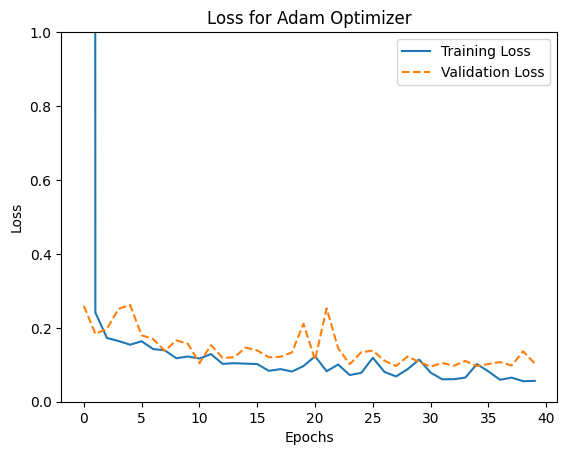

In [22]:
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib

plt.plot(mod_adam_hist.index, mod_adam_hist["loss"], label="Training Loss")
plt.plot(mod_adam_hist.index, mod_adam_hist["val_loss"], label="Validation Loss", linestyle="dashed")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss for Adam Optimizer")
plt.legend()

plt.ylim(0, 1)  # Set y-axis range between 0 and 1

plt.show()

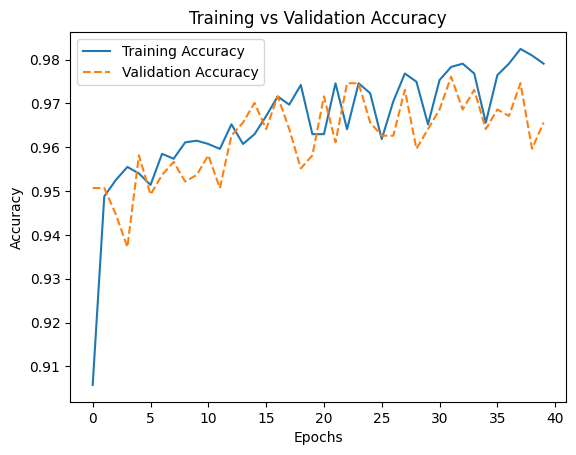

In [23]:
plt.plot(mod_adam_hist.index, mod_adam_hist["accuracy"], label="Training Accuracy")
plt.plot(mod_adam_hist.index, mod_adam_hist["val_accuracy"], label="Validation Accuracy", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [24]:
adam_test_loss, adam_test_accuracy = model_adam.evaluate(x_test,y_test)
print(f"Test Loss = {adam_test_loss}")
print(f"Test accuracy = {adam_test_accuracy*100}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9620 - loss: 0.1560
Test Loss = 0.14971542358398438
Test accuracy = 96.95431590080261%


In [25]:
from sklearn.metrics import classification_report


In [26]:
y_pred_probs =model_adam.predict(x_val)  # Predict probabilities
y_pred = y_pred_probs.argmax(axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [27]:
# Convert y_val (true labels) to multiclass format before using classification_report
y_val_multiclass = np.argmax(y_val, axis=1)

# Now calculate the classification report
report = classification_report(y_val_multiclass, y_pred, target_names=['BLI', 'FICE', 'LCI', 'NBI', 'WLI'])
print(report)

              precision    recall  f1-score   support

         BLI       0.83      0.71      0.77         7
        FICE       0.82      0.90      0.86        10
         LCI       0.97      0.99      0.98       614
         NBI       0.81      0.68      0.74        25
         WLI       1.00      0.08      0.14        13

    accuracy                           0.96       669
   macro avg       0.89      0.67      0.70       669
weighted avg       0.96      0.96      0.95       669



In [28]:
# Get predictions for the test set
predictions = model_adam.predict(x_test)

# Convert predictions to class labels (0, 1, 2, 3, or 4)
predicted_labels = np.argmax(predictions, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [29]:
# Get true labels from the test set
true_labels = np.argmax(y_test, axis=1)

# Compare predicted and true labels to find incorrect predictions
incorrect_indices = np.where(predicted_labels != true_labels)[0]

In [30]:
# Print some examples of incorrect predictions
for index in incorrect_indices[:10]:  # Print the first 10 incorrect predictions
    print(f"Image index: {index}, Predicted: {predicted_labels[index]}, True: {true_labels[index]}")

Image index: 24, Predicted: 1, True: 0
Image index: 31, Predicted: 2, True: 3
Image index: 58, Predicted: 3, True: 2
Image index: 91, Predicted: 1, True: 0
Image index: 92, Predicted: 1, True: 0
Image index: 106, Predicted: 2, True: 4
Image index: 148, Predicted: 2, True: 4
Image index: 153, Predicted: 2, True: 0
Image index: 161, Predicted: 2, True: 3
Image index: 259, Predicted: 2, True: 3


In [31]:
 image_24= x_test[24]

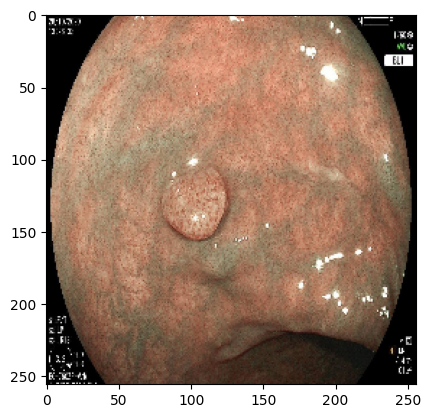

In [32]:
plt.imshow(image_24)

In [33]:
test_img = cv2.resize(image_24.numpy(), (256,256)) # This line is crucial
test_img = np.expand_dims(test_img, axis=0)
import numpy as np

# Assuming you have already loaded and preprocessed test_img
predictions = model_adam.predict(test_img)
predicted_class_index = np.argmax(predictions, axis=1)

print(predicted_class_index[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1


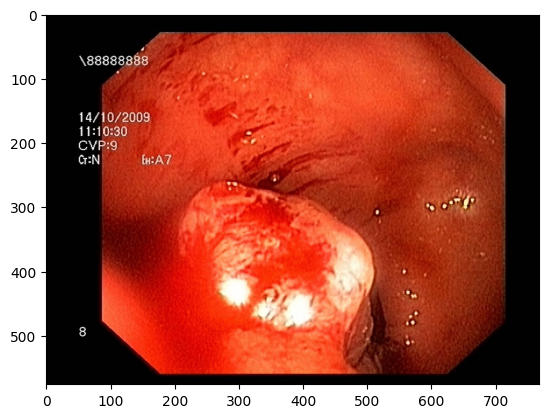

In [34]:
# Assuming 'image_paths' contains all filenames and 'x_test' indices relate to 'image_paths'
# ... (your previous code) ...

# ... (code where you got incorrect_indices) ...

# Get the filename for image index 35 in the test set
incorrect_image_path = image_paths[incorrect_indices[1]]  # Since 35 was the first incorrect prediction
incorrect_image = plt.imread(incorrect_image_path)
plt.imshow(incorrect_image)

In [35]:
 first_image = x_test[0]

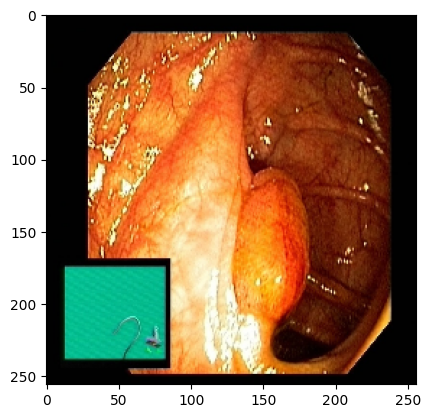

In [36]:
plt.imshow( first_image)

In [37]:
test_img = cv2.resize( first_image.numpy(), (256,256)) # This line is crucial
test_img = np.expand_dims(test_img, axis=0)
import numpy as np

# Assuming you have already loaded and preprocessed test_img
predictions = model_adam.predict(test_img)
predicted_class_index = np.argmax(predictions, axis=1)

print(predicted_class_index[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2


In [38]:
true_class = list(label_map.keys())[list(label_map.values()).index(predicted_class_index)]
print(f"True class: {true_class}")

True class: WLI


In [39]:
# Calculate overall accuracy on the test set
accuracy = np.sum(predicted_labels == true_labels) / len(true_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 96.95%


In [40]:
import cv2

In [41]:
test_img=cv2.imread('/content/NBI_07.jpg')

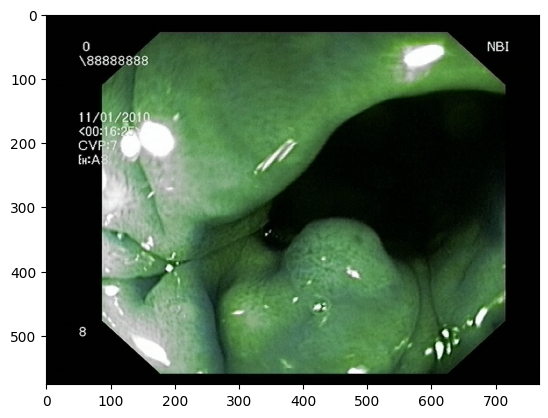

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(576, 768, 3)

In [44]:

test_img = cv2.resize(test_img, (256,256)) # This line is crucial
test_img = np.expand_dims(test_img, axis=0)
import numpy as np

# Assuming you have already loaded and preprocessed test_img
predictions = model_adam.predict(test_img)
predicted_class_index = np.argmax(predictions, axis=1)

print(predicted_class_index[0]) # Output: The predicted class index for the image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3


In [45]:
true_class = list(label_map.keys())[list(label_map.values()).index(predicted_class_index)]
print(f"True class: {true_class}")

True class: NBI


Data Augumentation

In [46]:
!pip install elasticdeform

In [47]:
import os
import shutil

def divide_merged_pics(merged_pics_folder, output_folder):
    """Divides merged pictures into separate folders based on mode."""

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get all image files in the merged_pics_folder
    image_files = [f for f in os.listdir(merged_pics_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Iterate through each image file
    for image_file in image_files:
        # Extract mode from filename (assuming format: "MODE_image.jpg")
        mode = image_file.split("_")[0]

        # Create mode folder if it doesn't exist
        mode_folder = os.path.join(output_folder, mode)
        os.makedirs(mode_folder, exist_ok=True)

        # Move image to the corresponding mode folder
        source_path = os.path.join(merged_pics_folder, image_file)
        destination_path = os.path.join(mode_folder, image_file)
        shutil.move(source_path, destination_path)

    print("✅ Merged pictures divided into mode folders successfully!")

# Set paths
merged_pics_folder = "/content/dataset/MERGED_PICS"  # Path to your merged pictures folder
output_folder = "/content/dataset/divided_pics"  # Path to the output folder

# Call the function to divide the images
divide_merged_pics(merged_pics_folder, output_folder)

✅ Merged pictures divided into mode folders successfully!


In [48]:
from collections import Counter

# Count occurrences of each label
label_counts = Counter(image_labels)

# Print the count of images in each class
for class_name, label in label_map.items():
    count = label_counts.get(label, 0)

    print(f"Class {class_name} ({label}): {count} images")

print(f" Sample Labels: {image_labels[:10]}")

Class BLI (0): 70 images
Class LCI (1): 60 images
Class WLI (2): 3588 images
Class NBI (3): 146 images
Class FICE (4): 70 images
 Sample Labels: [2, 4, 2, 2, 2, 2, 2, 2, 2, 2]


In [61]:
import os
import cv2
import numpy as np
import tensorflow as tf
import elasticdeform
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

def augment_image(image, mode):
    """Apply augmentation strategies based on mode."""
    aug_img = image.copy()

    if mode == "FICE":
        datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.2, horizontal_flip=True)
    elif mode == "NBI":
        datagen = ImageDataGenerator(rotation_range=10, horizontal_flip=True, zoom_range=0.2)
        aug_img = cv2.GaussianBlur(aug_img, (3, 3), 0)
    elif mode == "LCI":
        datagen = ImageDataGenerator(rotation_range=15,zoom_range=0.1)

    elif mode == "BLI":
        datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True)



    # Elastic deformation (for all but BLI)


    # Apply ImageDataGenerator transformations
    aug_img = next(datagen.flow(np.expand_dims(aug_img, axis=0), batch_size=1))[0]

    return aug_img.astype(np.uint8)


def balance_dataset(input_folder, output_folder, target_count, mode):
    """Generates augmented images and copies originals to reach target count."""
    os.makedirs(output_folder, exist_ok=True)
    images = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Count the **existing** images in the output folder to avoid re-augmenting
    existing_images = [f for f in os.listdir(output_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    current_count = len(existing_images)

    print(f"Processing {mode} - Existing in output: {current_count}, Target: {target_count}")

    # Copy original images **only if they don't exist in output folder**
    copied_count = 0
    for img_name in images:
        src_path = os.path.join(input_folder, img_name)
        dest_path = os.path.join(output_folder, img_name)

        if not os.path.exists(dest_path):  # Avoid duplicate copying
            shutil.copy(src_path, dest_path)
            copied_count += 1

    current_count += copied_count  # Update count after copying originals

    # Augment images **only if needed**
    while current_count < target_count:
        img_name = np.random.choice(images)
        img_path = os.path.join(input_folder, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            aug_img = augment_image(img, mode)
            aug_name = f"aug_{current_count}.jpg"
            cv2.imwrite(os.path.join(output_folder, aug_name), aug_img)
            current_count += 1

    print(f"✅ {mode} balanced to {current_count} images (including originals).")


def downsample_dataset(input_folder, output_folder, target_count):
    """Reduces the dataset size by randomly selecting target_count images."""
    os.makedirs(output_folder, exist_ok=True)
    images = [f for f in os.listdir(input_folder) if f.endswith(('.jpg'))]

    # Ensure we only select exactly `target_count` images
    if len(images) > target_count:
        selected_images = np.random.choice(images, target_count, replace=False)
    else:
        selected_images = images  # If already balanced, keep as is

    for img_name in selected_images:
        src_path = os.path.join(input_folder, img_name)
        dest_path = os.path.join(output_folder, img_name)
        shutil.copy(src_path, dest_path)

    print(f"✅ Downsampled {input_folder} to {target_count} images.")


# Paths to dataset folders
base_path = "/content/dataset/divided_pics"
output_path = "./augmented1_dataset/"

# Class distribution before augmentation
original_counts = {
    "BLI": 70,
    "LCI": 60,
    "WLI": 3588,  # Majority class
    "NBI": 146,
    "FICE": 70
}

# Target count for balancing
target_counts = {
    "BLI": 450,
    "FICE":500,
    "LCI": 450,
    "NBI": 450,
    "WLI": 500
}

# Process each class
for mode, target_count in target_counts.items():
    input_folder = os.path.join(base_path, mode)
    output_folder = os.path.join(output_path, mode)
    current_count = original_counts.get(mode, 0)

    # Fixed indentation here
    if mode == "WLI" and current_count > target_count:
        downsample_dataset(input_folder, output_folder, target_count)
    elif current_count < target_count:
        balance_dataset(input_folder, output_folder, target_count, mode)
    else:
        print(f"⚠️ {mode} already balanced at {current_count} images, skipping.")

print("✅ Dataset successfully balanced!")



Processing BLI - Existing in output: 0, Target: 450
✅ BLI balanced to 450 images (including originals).
Processing FICE - Existing in output: 0, Target: 500
✅ FICE balanced to 500 images (including originals).
Processing LCI - Existing in output: 0, Target: 450
✅ LCI balanced to 450 images (including originals).
Processing NBI - Existing in output: 0, Target: 450
✅ NBI balanced to 450 images (including originals).
✅ Downsampled /content/dataset/divided_pics/WLI to 500 images.
✅ Dataset successfully balanced!


In [62]:
import os
import pandas as pd

# Define paths and label mapping
data_dir = "/content/augmented1_dataset"  # Path to your augmented dataset
label_map = {
    "BLI": 0,
    "LCI": 1,
    "WLI": 2,
    "NBI": 3,
    "FICE": 4
}
image_data = []

# Iterate through subdirectories (BLI, FICE, LCI, NBI, WLI)
for subdir in label_map.keys():
    subdir_path = os.path.join(data_dir,subdir)

    # Check if it's a directory
    if os.path.isdir(subdir_path):
        # Get the label for the current subdirectory
        label = label_map.get(subdir)

        # Iterate through images in the subdirectory
        for filename in os.listdir(subdir_path):
            if filename.endswith(('.jpg')):
                # Extract the image name and label
                image_name = filename
                image_data.append([image_name, label])

# Create a Pandas DataFrame
df = pd.DataFrame(image_data, columns=["image_filename", "label"])

print("Image data and labels stored in DataFrame 'df'")
print(df.head())  # Display the first few rows of the DataFrame

Image data and labels stored in DataFrame 'df'
  image_filename  label
0    aug_316.jpg      0
1    aug_139.jpg      0
2    aug_242.jpg      0
3     BLI_30.jpg      0
4    aug_265.jpg      0


In [63]:
image_labels = df['label'].tolist()

In [64]:
from collections import Counter
import pandas as pd



# Now you can use Labeled_Images in the Counter function
label_counts = Counter(image_labels)

# Print the count of images in each class

for class_name, label in label_map.items():
    count = label_counts.get(label, 0)
    print(f"Class {class_name} ({label}): {count} images")



Class BLI (0): 450 images
Class LCI (1): 450 images
Class WLI (2): 500 images
Class NBI (3): 450 images
Class FICE (4): 500 images


In [65]:
image_labels_shape = df['label'].shape

# Print the shape
print(image_labels_shape)

(2350,)


In [66]:
num_labels = df['label'].to_numpy()

In [67]:
num_labels.shape

(2350,)

In [68]:
import os
import cv2
import numpy as np

# Set the path to your augmented dataset
augmented_dataset_path = "/content/augmented1_dataset"

image_paths = []  # Store image paths
images1 = []  # Store image data

# Desired shape for resizing (if needed)
desired_shape = (512,512)

# Iterate through subdirectories (BLI, FICE, LCI, NBI, WLI)
for subdir in os.listdir(augmented_dataset_path):
    subdir_path = os.path.join(augmented_dataset_path, subdir)

    # Check if it's a directory
    if os.path.isdir(subdir_path):
        # Iterate through images in the subdirectory
        for filename in os.listdir(subdir_path):
            if filename.endswith('.jpg'):  # Only load JPG images
                img_path = os.path.join(subdir_path, filename)
                image_paths.append(img_path)

                img = cv2.imread(img_path)

                if img is not None:  # Ensure image is loaded correctly
                    img = cv2.resize(img, desired_shape)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                    images1.append(img)

print(f"Loaded {len(images1)} images1.")

# Convert to NumPy array
images_augmented = np.array(images1, dtype=np.uint8)  # Store in a new variable

print(f"Final image array shape: {images_augmented.shape}")

Loaded 2350 images1.
Final image array shape: (2350, 512, 512, 3)


In [69]:
from tensorflow.keras.utils import to_categorical # Import the to_categorical function

data_labels1 = to_categorical(num_labels) #Now to_categorical is defined and can be used.
data_labels1.shape

(2350, 5)

In [70]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(
    images_augmented, data_labels1, test_size=0.15, random_state=49
)

# Convert to TensorFlow tensors
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1997, 512, 512, 3)
(353, 512, 512, 3)
(1997, 5)
(353, 5)


In [159]:
num_classes = 5
learning_rate = 0.01
batch_size = 32
num_epochs = 40
decay = 0.0001
momentum = 0.5

In [114]:
from tensorflow import keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam , Adagrad, SGD, RMSprop
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalMaxPooling2D


In [171]:
def get_model():
    model = keras.models.Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(512,512,3)))
    model.add(MaxPool2D((2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPool2D((2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPool2D((2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPool2D((2,2)))
    model.add(BatchNormalization())

    model.add(GlobalMaxPooling2D())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [172]:
keras.backend.clear_session()

In [173]:
model_adam = get_model()
model_adam.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 512, 512, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,629 (385.27 KB)

 Trainable params: 98,181 (383.52 KB)

 Non-trainable params: 448 (1.75 KB)

In [174]:
model_adam.compile(optimizer=Adam(learning_rate=learning_rate, decay = decay) ,
              loss='categorical_crossentropy', metrics = ["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [175]:
callback = EarlyStopping(monitor = "loss", patience = 3, restore_best_weights=True)

model_adam_history = model_adam.fit(x_train,y_train, validation_data=(x_test, y_test) , epochs= num_epochs, batch_size= batch_size, callbacks = [callback])

Epoch 1/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 305ms/step - accuracy: 0.3344 - loss: 4.0863 - val_accuracy: 0.1756 - val_loss: 10.1022
Epoch 2/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 219ms/step - accuracy: 0.7427 - loss: 0.7161 - val_accuracy: 0.2436 - val_loss: 3.7496
Epoch 3/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - accuracy: 0.8559 - loss: 0.4318 - val_accuracy: 0.6969 - val_loss: 0.8561
Epoch 4/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.8898 - loss: 0.3572 - val_accuracy: 0.5354 - val_loss: 1.6248
Epoch 5/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.9005 - loss: 0.3278 - val_accuracy: 0.8159 - val_loss: 0.5489
Epoch 6/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.9056 - loss: 0.3145 - val_accuracy: 0.9178 - val_loss: 0.2849
Epoch 7/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.9118 - loss: 0.2876 - val_accuracy: 0.9235 - val_loss: 0.2729
Epoch 8/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.9172 - loss: 0.2953 - val_acc

In [176]:
mod_adam_hist = pd.DataFrame(model_adam_history.history)
mod_adam_hist

,accuracy,loss,val_accuracy,val_loss
0,0.413620,2.155198,0.175637,10.102244
1,0.789184,0.599810,0.243626,3.749561
2,0.860290,0.424445,0.696884,0.856061
3,0.892339,0.362850,0.535411,1.624836
4,0.902854,0.317945,0.815864,0.548893
5,0.909364,0.303894,0.917847,0.284930
6,0.916375,0.272407,0.923513,0.272889
7,0.921883,0.281257,0.923513,0.248694
8,0.923886,0.254817,0.713881,0.842423
9,0.916875,0.278476,0.917847,0.274361


Text(0, 0.5, 'Loss')

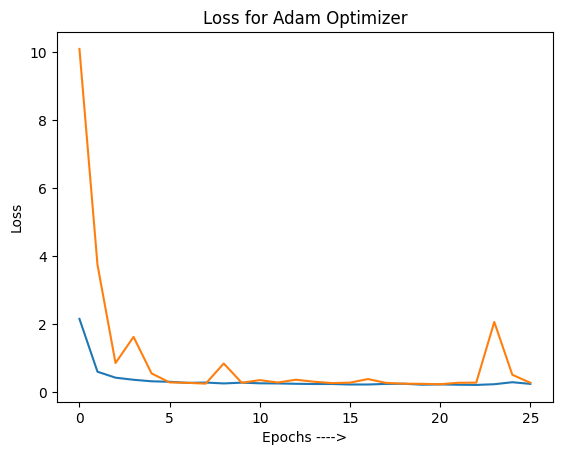

In [177]:
plt.plot(mod_adam_hist.index, mod_adam_hist["loss"])
plt.plot(mod_adam_hist.index, mod_adam_hist["val_loss"])

plt.title("Loss for Adam Optimizer")
plt.xlabel("Epochs ---->")
plt.ylabel("Loss")

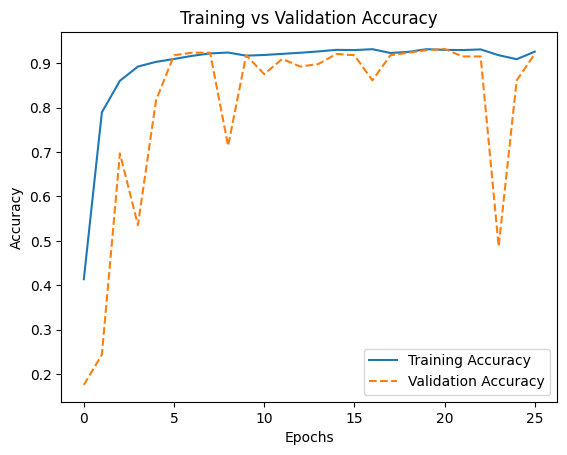

In [178]:
plt.plot(mod_adam_hist.index, mod_adam_hist["accuracy"], label="Training Accuracy")
plt.plot(mod_adam_hist.index, mod_adam_hist["val_accuracy"], label="Validation Accuracy", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

In [179]:
from sklearn.metrics import classification_report

In [187]:
y_pred_probs =model_adam.predict(x_test)  # Predict probabilities
y_pred = y_pred_probs.argmax(axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [188]:
# Convert y_val (true labels) to multiclass format before using classification_report
y_val_multiclass = np.argmax(y_test, axis=1)

# Now calculate the classification report
report = classification_report(y_val_multiclass, y_pred, target_names=['BLI', 'FICE', 'LCI', 'NBI', 'WLI'])
print(report)

              precision    recall  f1-score   support

         BLI       0.93      0.89      0.91        72
        FICE       0.84      0.92      0.88        62
         LCI       1.00      0.86      0.93        72
         NBI       0.90      1.00      0.95        72
         WLI       0.92      0.91      0.91        75

    accuracy                           0.92       353
   macro avg       0.92      0.92      0.91       353
weighted avg       0.92      0.92      0.92       353



In [192]:
y_pred_probs1 =model_adam.predict(x_train)  # Predict probabilities
y_pred1 = y_pred_probs1.argmax(axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step


In [193]:
# Convert y_val (true labels) to multiclass format before using classification_report
y_val_multiclass1 = np.argmax(y_train, axis=1)

# Now calculate the classification report
report = classification_report(y_val_multiclass, y_pred, target_names=['BLI', 'FICE', 'LCI', 'NBI', 'WLI'])
print(report)

              precision    recall  f1-score   support

         BLI       0.90      0.91      0.90       378
        FICE       0.90      0.88      0.89       388
         LCI       1.00      0.90      0.95       428
         NBI       0.87      1.00      0.93       378
         WLI       0.92      0.89      0.91       425

    accuracy                           0.92      1997
   macro avg       0.92      0.92      0.92      1997
weighted avg       0.92      0.92      0.92      1997

